In [44]:
! pip install -U pip
! pip install -U matplotlib
! pip install -U numpy
! pip install -U scipy

In [65]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.integrate import quad
from typing import Callable

In [66]:
def func_2(x):
    return math.sin(x) + 1

In [67]:
def func_1(x):
    return math.sin((x * math.pi) / 12)

In [68]:
def plot(x, y):
    plt.plot(x, y)
    plt.grid(True)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

In [69]:
def cross_corelation_element(
        array_1: np.ndarray,
        array_2: np.ndarray,
        lag: int) -> float:
    """
    При отрицательном lag
    становится меньше размера одного из исходных массивов на
    значение lag, что не позволяет выйти за пределы второго массива.
    """
    last_index = 0
    if lag < 0:
        last_index = len(array_1) + lag
    else:
        last_index = len(array_1)

    """
    При положительном сдвиге данное условие
    заставляет оператор суммирования начать не с первого элемента
    массивов, а с 1 + lag, поскольку иначе будут перемножаться не
    перекрывающиеся элементы. Для первого массива всегда будут взяты
    элементы, начиная с первого.
    """
    begin_index = 1
    if lag > 0:
        begin_index = lag + 1

    result = []
    for i in range(begin_index, last_index):
        result.append(array_1[i] * array_2[i - lag])
    return sum(result)

In [70]:
def lags(array):
    return np.arange(-len(array), len(array), 1, dtype=int)

In [71]:
def cross_corelation(
        array_1: np.ndarray,
        array_2: np.ndarray) -> list:
    result = []
    for lag in lags(array_1):
        result.append(cross_corelation_element(array_1, array_2, lag))
    return result

In [72]:
def auto_corelation(
    array: np.ndarray
) -> list:
    return cross_corelation(array, array)

In [79]:
def contigious_corelation(
    func_1: Callable,
    func_2: Callable,
    laggs: np.ndarray,
    a: int,
    b: int,
) -> list:
    def mul_func(x, T):
        return func_1(x) * func_2(x - T)
    result = []
    for lag in laggs:
        integral, _ = quad(mul_func, a, b, args=(lag,))
        result.append(integral)
    return result

In [80]:
def auto_contigious_corelation(
    func: Callable,
    laggs: np.ndarray,
    a: int,
    b: int
) -> list:
    return contigious_corelation(func, func, laggs, a, b)

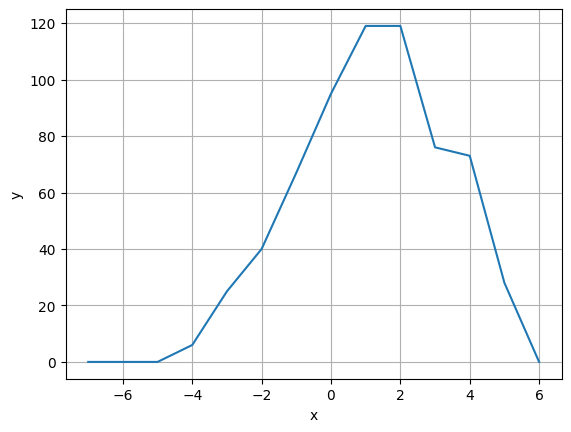

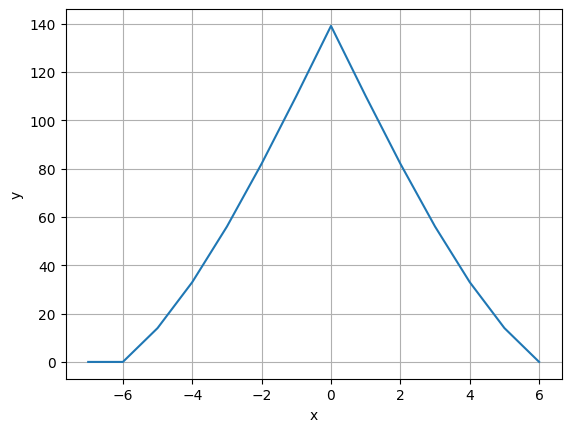

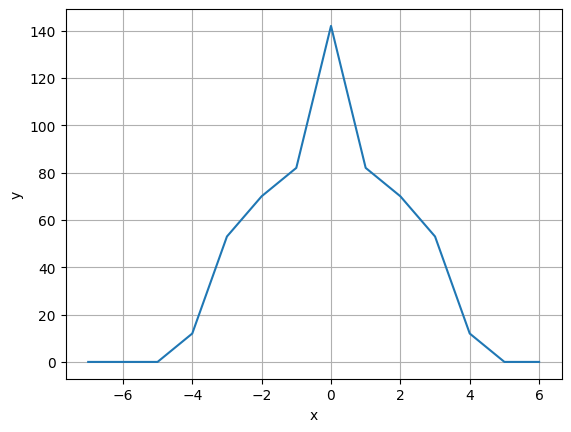

In [81]:
x = np.linspace(-10, 10, 100)
y_1 = [1, 2, 3, 4, 5, 6, 7]
y_2 = [2, 4, 7, 2, 8, 3, 0]
cc = cross_corelation(y_1, y_2)
plot(lags(y_1), cc)
plot(lags(y_1), auto_corelation(y_1))
plot(lags(y_2), auto_corelation(y_2))

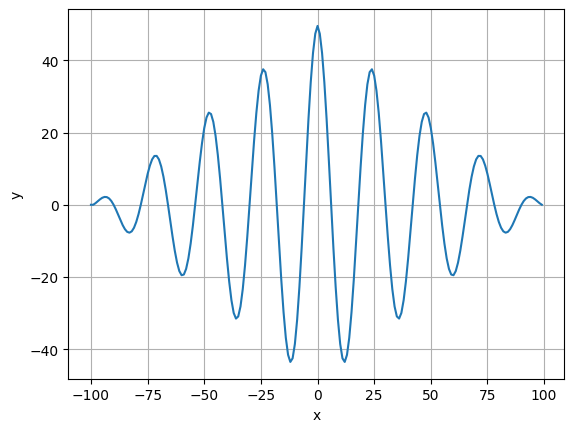

In [82]:
x = np.linspace(1, 100, 100)
y_1 = [func_1(value) for value in x]
plot(lags(y_1), auto_corelation(y_1))

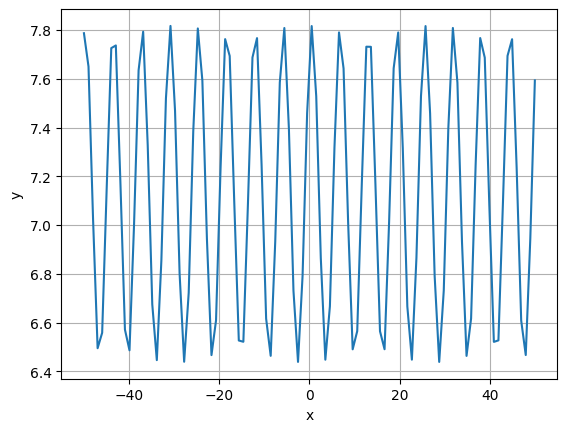

In [83]:
laggs = np.linspace(-50, 50, 100)
cc = np.array(contigious_corelation(func_1, func_2, laggs, 0, 10))
plot(laggs, cc)

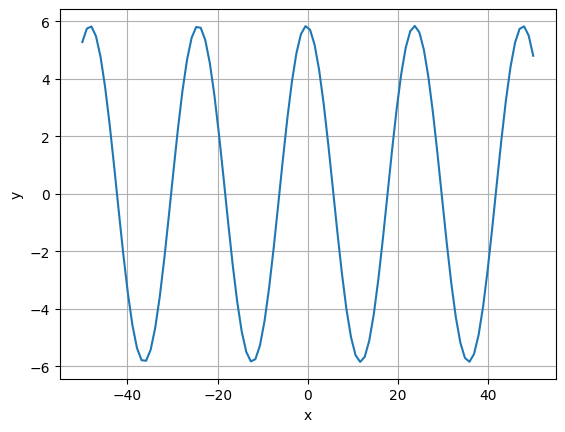

In [86]:
laggs = np.linspace(-50, 50, 100)
cc = np.array(auto_contigious_corelation(func_1, laggs, 0, 10))
plot(laggs, cc)